In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cars_df = pd.read_csv('./audi.csv')

In [3]:
cars_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [53]:
cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


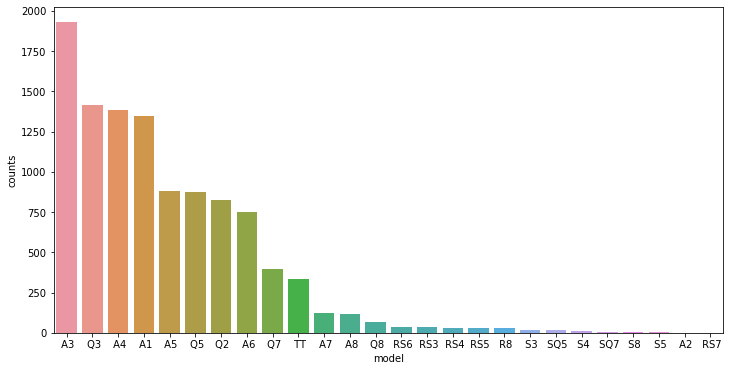

In [5]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)

amount_per_model=cars_df["model"].value_counts().rename_axis('model').reset_index(name='counts')

sns.barplot(x="model", y="counts",data=amount_per_model)




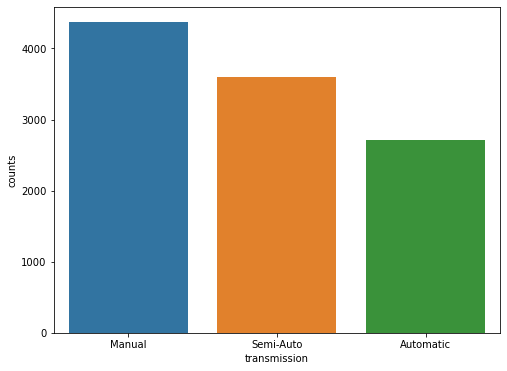

In [6]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

amount_per_transmission=cars_df["transmission"].value_counts().rename_axis('transmission').reset_index(name='counts')

sns.barplot(x="transmission", y="counts",data=amount_per_transmission)

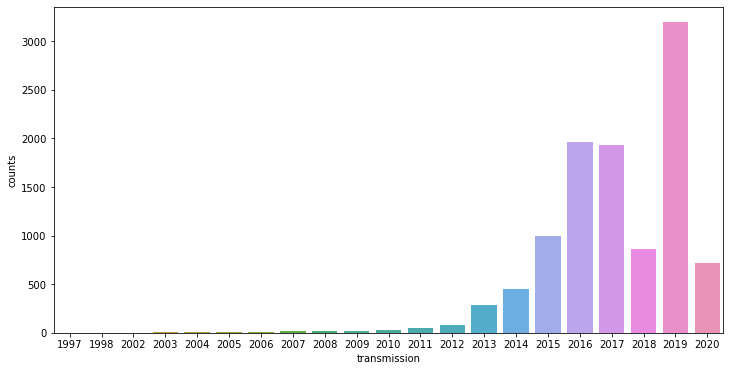

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
amount_per_year=cars_df["year"].value_counts().rename_axis('transmission').reset_index(name='counts')
sns.barplot(x="transmission", y="counts",data=amount_per_year)

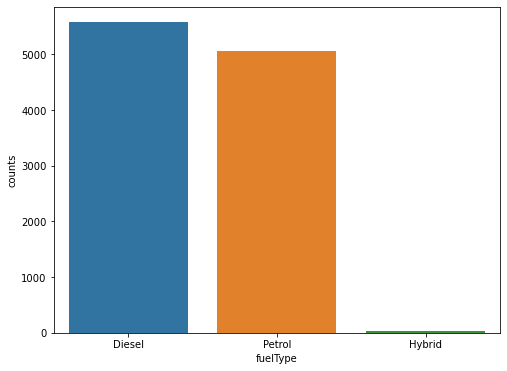

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
amount_per_fuel_type=cars_df["fuelType"].value_counts().rename_axis('fuelType').reset_index(name='counts')
sns.barplot(x="fuelType", y="counts",data=amount_per_fuel_type)

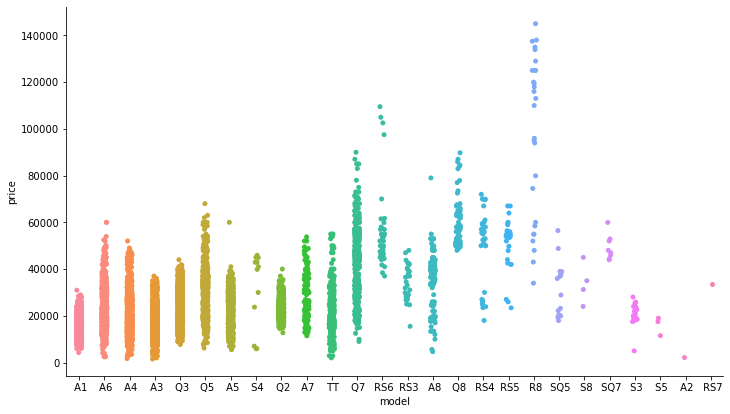

In [31]:
cars_cat_plot = sns.catplot(x="model", y="price", data=cars_df)
cars_cat_plot.fig.set_figwidth(12)
cars_cat_plot.fig.set_figheight(6)


In [50]:
cars_df[["model","price"]].groupby("model").mean().reset_index().sort_values('price', ascending=False)

,model,price
13,R8,97652.214286
12,Q8,60115.014493
17,RS6,55963.871795
16,RS5,51265.206897
15,RS4,50151.612903
24,SQ7,49269.000000
11,Q7,44788.319899
7,A8,34981.847458
14,RS3,34050.515152
22,S8,33807.750000


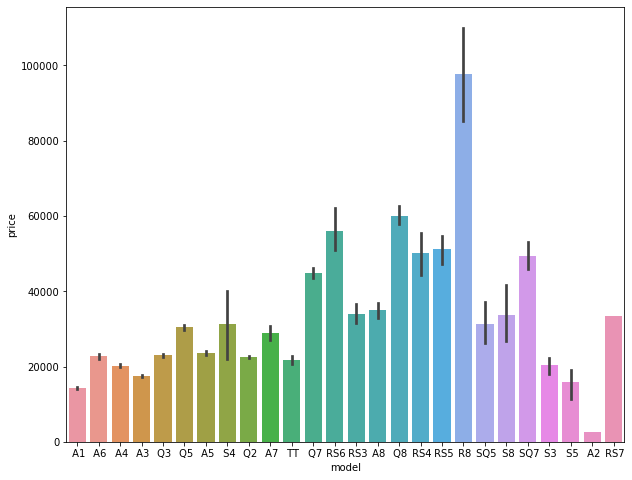

In [37]:
fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.barplot(x="model", y="price", data=cars_df)
plt.show()


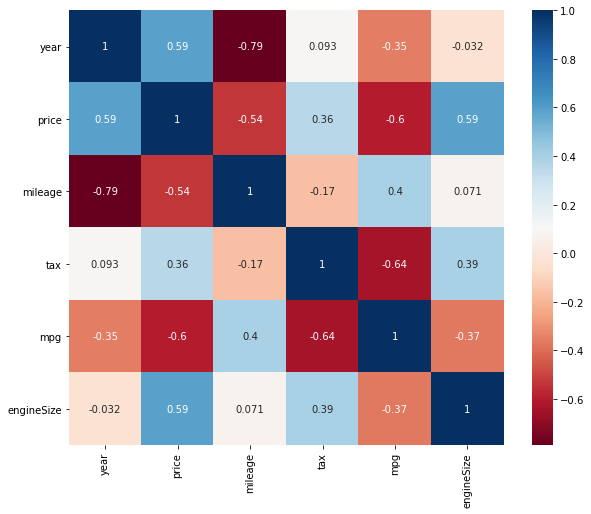

In [9]:
colormap = plt.cm.RdBu
sns.heatmap(cars_df.corr(), annot=True, cmap=colormap,square=True )
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()